# **Util**: Topology generation 

## set syspath and import libraries

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..', 'simulator/src')))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from matplotlib.backends.backend_pdf import PdfPages

from simulator.topology_gen import TopologyGenerator

## Generate Topology

1. set configuration dict to create topology. see documentation of TopologyGenerator for further information
2. create topology generator object and pass configuration
3. read a MEC topology (including only the core network of the network to be modelled)
4. create topology with end devices and corresponding resource properties as defined in configuration
5. save topology with a proper name

In [2]:
config = {
            "device_amount": 20, # number of end devices
            # computing node characteristics
            "nodes": {
                "iot": {
                    "capacity": 1 # computing core
                },
                "edge": {
                    "capacity": 20, # amount of computing cores
                    "f": 3e9 # processor frequency
                },
                "cloud": {
                    "capacity": 2000, # amount of computing cores
                    "f": 3.4e9 # processor frequency
                }
            },
            # link characteristics 
            "links": {
                "iot": {
                    "capacity": 200 # Mbps
                },
                "edge": {
                    "capacity": 2000 # Mbps
                },
                "cloud": {
                    "capacity": 4000 # Mbps
                },
            }
        }

In [3]:
tg = TopologyGenerator()
tg.set_config(config)


In [4]:
tg.read_mec_topo("../../external_resources/topology_for_test/25N50E/graph.txt")
tg.create_topo(random_end=False)
tg.save_topo("./25N50E_20cl_random.json")

### Draw MEC network

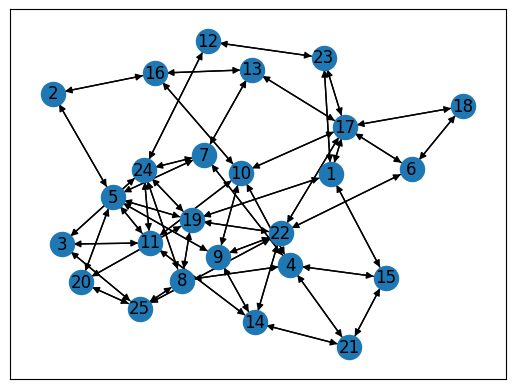

In [5]:
nx.draw_networkx(tg.mec_network)

### Draw full topology
CAUTION: might be heavy on memory and take some time due to topology size

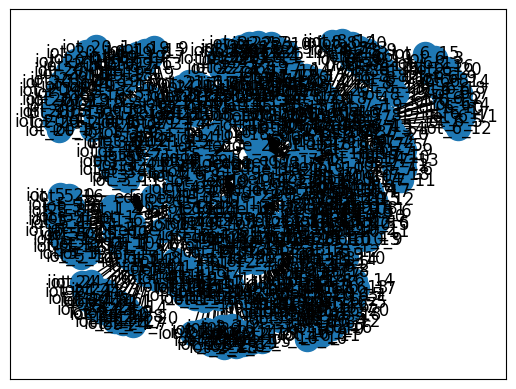

In [6]:
nx.draw_networkx(tg.topology)

Trick when reading in a topology that already has a cloud node and edge nodes that should not be changed

In [16]:
# tg.read_mec_topo("../../external_resources/topology_for_test/topo_ex_mec.json", file_type="json")
# tg.topology = tg.mec_network
# tg._add_end_nodes()
# tg.save_topo("../../external_resources/sim_topologies/topo_ex_3_25cl.json")

# Create a new feasible topology
read in MEC topology

In [100]:
tg.read_mec_topo("../../external_resources/topology_for_test/25N50E/graph.txt")

Remove 13 nodes to still have 12

In [101]:
rng = np.random.default_rng(14)
remove_nodes = rng.choice(list(tg.mec_network.nodes), size=13, replace=False)
for node in remove_nodes:
    tg.mec_network.remove_node(node)

Ensure the nodes are connected

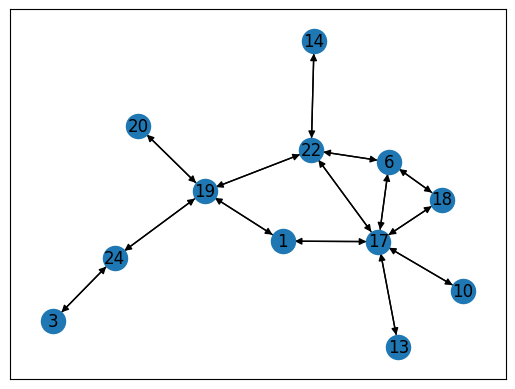

In [102]:
nx.draw_networkx(tg.mec_network)

In [103]:
print(len(tg.mec_network.nodes))
print(len(tg.mec_network.edges))

12
28


In [104]:
tg.create_topo(random_end=False)
tg.save_topo("../../external_resources/sim_topologies/12N28E_20cl.json")